# Network Analysis of Merchant of Venice Characters

### Importing necessary dependencies

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from spacy import displacy
from collections import defaultdict

import pandas as pd
import numpy as np
import spacy
import networkx as nx
import time
import matplotlib.pyplot as plt
import pickle
import scipy

### Downloading English Language Model

In [2]:
!python3 -m spacy download en_core_web_sm

### Web Scraping Necessary Character Names

In [3]:
# In headers, enter your system User-Agent from the following website : https://www.whatismybrowser.com/detect/what-is-my-user-agent/
headers = {"User-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}
URL = "https://www.sparknotes.com/shakespeare/merchant/characters/"

In [30]:
# Installing the webdriver to run a sample chrome window
driver = webdriver.Chrome(ChromeDriverManager().install())

In [31]:
# Running the above stated URL
driver.get(URL)

In [6]:
# Scraping character list from the website and making a dataframe out of it
character_list = driver.find_elements_by_tag_name(name='h3')
characters = defaultdict(list)

for character in character_list:
    characters['Name'].append(character.text)

characters = pd.DataFrame.from_dict(characters)
characters = characters.drop(list(range(18,35)))

In [32]:
characters

,Name
0,Shylock
1,Portia
2,Antonio
3,Jessica
4,Bassanio
5,Gratiano
6,Lorenzo
7,Nerissa
8,Launcelot Gobbo
9,The prince of Morocco


In [142]:
characters.to_csv('Characters.csv')

In [2]:
characters = pd.read_csv('Characters.csv')

### Webscraping the Summary of all the Acts

In [61]:
URL = "https://nosweatshakespeare.com/plays/modern-the-merchant-of-venice/"

In [62]:
driver.get(URL)

In [63]:
# Extracting and cleaning the Act Names scraped from the website
table = driver.find_elements_by_tag_name(name='table')
Act_List = table[0].text.split("\n")
Act_List = [x.split("|") for x in Act_List]
Act_List = [x[0] for x in Act_List]
Act_List = [x for x in Act_List if x!='']
Act_List = [x.rstrip() for x in Act_List]
Act_List = Act_List[1:]
Act_List

['Modern The Merchant of Venice Act 1, Scene 1',
 'Modern The Merchant of Venice Act 1, Scene 2',
 'Modern The Merchant of Venice Act 1, Scene 3',
 'Modern The Merchant of Venice Act 2, Scene 1',
 'Modern The Merchant of Venice Act 2, Scene 2',
 'Modern The Merchant of Venice Act 2, Scene 3',
 'Modern The Merchant of Venice Act 2, Scene 4',
 'Modern The Merchant of Venice Act 2, Scene 5',
 'Modern The Merchant of Venice Act 2, Scene 6',
 'Modern The Merchant of Venice Act 2, Scene 7',
 'Modern The Merchant of Venice Act 2, Scene 8',
 'Modern The Merchant of Venice Act 2, Scene 9',
 'Modern The Merchant of Venice Act 3, Scene 1',
 'Modern The Merchant of Venice Act 3, Scene 2',
 'Modern The Merchant of Venice Act 3, Scene 3',
 'Modern The Merchant of Venice Act 3, Scene 4',
 'Modern The Merchant of Venice Act 3, Scene 5',
 'Modern The Merchant of Venice Act 4, Scene 1',
 'Modern The Merchant of Venice Act 4, Scene 2',
 'Modern The Merchant of Venice Act 5, Scene 1']

In [98]:
len(Act_List)

20

The code given below will scrape the summary of all the acts in the play

In [4]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

In [ ]:
# content = {}

# for scenes in Act_List :
#     try:
#         links = driver.find_element_by_link_text(scenes)
#         links.click()
#         content[scenes] = driver.find_elements_by_tag_name(name='p')
#         # print(len(content["Modern The Merchant of Venice Act 1, Scene 1"]))

#         index = 1
#         break_sentence = "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
#         final = ""

#         for para in content[scenes]:
#             if(para.text==break_sentence):
#                 break
#             # print(f"Count {index} : {para.text}")
#             final = final + para.text + "\n"
#             index+=1

#         content[scenes] = final
#         # print(content["Modern The Merchant of Venice Act 1, Scene 1"])

#         driver.back()
#     except StaleElementReferenceException:
#             links = driver.find_element_by_link_text(scenes)
#             links.click()
#             content[scenes] = driver.find_elements_by_tag_name(name='p')
#             # print(len(content["Modern The Merchant of Venice Act 1, Scene 1"]))

#             index = 1
#             break_sentence = "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
#             final = ""

#             for para in content[scenes]:
#                 if(para.text==break_sentence):
#                     break
#                 # print(f"Count {index} : {para.text}")
#                 final = final + para.text + "\n"
#                 index+=1

#             content[scenes] = final
#             # print(content["Modern The Merchant of Venice Act 1, Scene 1"])

#             driver.back()
        

In [99]:
# print(content.keys())

dict_keys(['Modern The Merchant of Venice Act 1, Scene 1', 'Modern The Merchant of Venice Act 1, Scene 2', 'Modern The Merchant of Venice Act 1, Scene 3', 'Modern The Merchant of Venice Act 2, Scene 1', 'Modern The Merchant of Venice Act 2, Scene 2', 'Modern The Merchant of Venice Act 2, Scene 3', 'Modern The Merchant of Venice Act 2, Scene 4', 'Modern The Merchant of Venice Act 2, Scene 5', 'Modern The Merchant of Venice Act 2, Scene 6', 'Modern The Merchant of Venice Act 2, Scene 7', 'Modern The Merchant of Venice Act 2, Scene 8', 'Modern The Merchant of Venice Act 2, Scene 9', 'Modern The Merchant of Venice Act 3, Scene 1', 'Modern The Merchant of Venice Act 3, Scene 2', 'Modern The Merchant of Venice Act 3, Scene 3', 'Modern The Merchant of Venice Act 3, Scene 4', 'Modern The Merchant of Venice Act 3, Scene 5', 'Modern The Merchant of Venice Act 4, Scene 1', 'Modern The Merchant of Venice Act 4, Scene 2'])


In [100]:
# links = driver.find_element_by_link_text('Modern The Merchant of Venice Act 5, Scene 1')
# links.click()
# content['Modern The Merchant of Venice Act 5, Scene 1'] = driver.find_elements_by_tag_name(name='p')
# # print(len(content["Modern The Merchant of Venice Act 1, Scene 1"]))

# index = 1
# break_sentence = "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
# final = ""

# for para in content['Modern The Merchant of Venice Act 5, Scene 1']:
#     if(para.text==break_sentence):
#         break
#     # print(f"Count {index} : {para.text}")
#     final = final + para.text + "\n"
#     index+=1

# content['Modern The Merchant of Venice Act 5, Scene 1'] = final

In [144]:
# file = open('All Acts and Scenes Dictionary', 'wb')
# pickle.dump(content, file)
# file.close()

Storing the file as pickle so that I won't have to re run the above code again

In [3]:
file = open('All Acts and Scenes Dictionary','rb')
content = pickle.load(file)
file.close()

In [4]:
print(content)

{'Modern The Merchant of Venice Act 1, Scene 1': 'Antonio, a prominent merchant, was on his way home from a meeting of Venetian ship-owners. His two friends, Solanio and Salerio, walked with him. The morning hadn’t gone well: Antonio had sat silently throughout. The depression that had fallen on him showed no sign of lifting and the two exchanged glances as their friend stopped at one of the marble columns of the Ca’ d’Oro and gazed out over the Grand Canal. Antonio’s low mood was becoming a worry to them.\nA funeral barge, decked in black and gold was passing slowly along the canal and the waves it caused made the gondolas prance and rear like wild black stallions as they strained against the ropes that tied them to their striped poles. Antonio stared out towards the open sea, then sighed and stepped back to join his friends beneath the balcony under which they stood waiting. ‘In all honesty, I really don’t know why I’m so depressed,’ he said. He attempted a smile and failed. ‘It’s ex

### Named Entity Recognition

In [5]:
# Load Spacy English Language model
NER = spacy.load('en_core_web_sm')

In [42]:
Act_1_Scene_1 = NER(content["Modern The Merchant of Venice Act 3, Scene 2"])
displacy.render(Act_1_Scene_1,style='ent',jupyter=True)

### Storing Entities for each sentence

In [30]:
sentence_entity_df = defaultdict(list)

for value in list(content.values()):
    
    Act_and_Scene = NER(value)

    for sent in Act_and_Scene.sents:
        entity_list = [ent.text for ent in sent.ents]
        sentence_entity_df['Sentence'].append(sent)
        sentence_entity_df['Entities'].append(entity_list)

sentence_entity_df = pd.DataFrame.from_dict(sentence_entity_df)
sentence_entity_df

,Sentence,Entities
0,"(Antonio, ,, a, prominent, merchant, ,, was, o...","[Antonio, Venetian]"
1,"(His, two, friends, ,, Solanio, and, Salerio, ...","[two, Solanio, Salerio]"
2,"(The, morning, had, n’t, gone, well, :, Antoni...","[The morning, Antonio]"
3,"(The, depression, that, had, fallen, on, him, ...","[two, one, Ca, the Grand Canal]"
4,"(Antonio, ’s, low, mood, was, becoming, a, wor...",[Antonio]
...,...,...
2482,"(‘, Let, ’s, do, that, ,, ’, said, Gratiano, .)",[Gratiano]
2483,"(Her, took, Nerissa, ’s, hand, and, led, the, ...",[]
2484,"(‘, The, first, question, my, Nerissa, will, b...","[first, Nerissa, tomorrow, night, only two mor..."
2485,"(If, it, were, morning, I, ’d, be, wishing, it...",[]


### Filtering the entities to be only names

In [8]:
# checking is the comparison is working or not
sentence_entity_df['Entities'][0][0] in list(characters['Name'])

True

In [31]:
def filter_entity(entity_list,characters):
    return [ent for ent in entity_list if ent in list(characters['Name'])]

In [32]:
sentence_entity_df['Entities'] = sentence_entity_df['Entities'].apply(lambda x : filter_entity(x,characters))
# removing empty entity list
sentence_entity_df = sentence_entity_df[sentence_entity_df['Entities'].map(len)>0]
sentence_entity_df = sentence_entity_df.reset_index(drop=True)
sentence_entity_df

,Sentence,Entities
0,"(Antonio, ,, a, prominent, merchant, ,, was, o...",[Antonio]
1,"(His, two, friends, ,, Solanio, and, Salerio, ...",[Solanio]
2,"(The, morning, had, n’t, gone, well, :, Antoni...",[Antonio]
3,"(Antonio, ’s, low, mood, was, becoming, a, wor...",[Antonio]
4,"(Antonio, stared, out, towards, the, open, sea...",[Antonio]
...,...,...
611,"(‘, Fair, ladies, ,, ’, cried, Lorenzo, .)",[Lorenzo]
612,"(‘, It, ’s, almost, morning, ,, ’, said, Porti...",[Portia]
613,"(‘, Let, ’s, do, that, ,, ’, said, Gratiano, .)",[Gratiano]
614,"(‘, The, first, question, my, Nerissa, will, b...",[Nerissa]


### Checking 3 rows of dataframe to create a relation between characters based on their interactions

In [33]:
window_size = 3
relations = defaultdict(list)

for i in range(sentence_entity_df.index[-1]):
    end_i = min(i+window_size,sentence_entity_df.index[-1])
    
    # The nextline concatenates all the lists in the given window and removes duplicates
    char_list = list(set(sum((sentence_entity_df.loc[i:end_i]['Entities']),[])))
    
    if len(char_list)>1:
        for idx, a in enumerate(char_list[:-1]):
            b = char_list[idx+1]
            relations['Source'].append(a)
            relations['Target'].append(b)
    
relations_df = pd.DataFrame.from_dict(relations)
relations_df

,Source,Target
0,Solanio,Antonio
1,Antonio,Solanio
2,Solanio,Antonio
3,Solanio,Antonio
4,Solanio,Antonio
...,...,...
1086,Nerissa,Portia
1087,Portia,Lorenzo
1088,Gratiano,Nerissa
1089,Nerissa,Portia


In [34]:
#We will consider the following cases same a->b and b->a
relations_df = pd.DataFrame(data=np.sort(relations_df.values,axis=1),columns=relations_df.columns)
relations_df

,Source,Target
0,Antonio,Solanio
1,Antonio,Solanio
2,Antonio,Solanio
3,Antonio,Solanio
4,Antonio,Solanio
...,...,...
1086,Nerissa,Portia
1087,Lorenzo,Portia
1088,Gratiano,Nerissa
1089,Nerissa,Portia


In [35]:
#We shall now assign weight to each relation based on the number of occurences
relations_df['value'] = 1
relations_df = relations_df.groupby(by=['Source','Target'],as_index=False).sum()
relations_df

,Source,Target,value
0,Antonio,Bassanio,44
1,Antonio,Gratiano,51
2,Antonio,Jessica,14
3,Antonio,Lorenzo,23
4,Antonio,Nerissa,2
5,Antonio,Portia,84
6,Antonio,Shylock,130
7,Antonio,Solanio,29
8,Antonio,Tubal,12
9,Bassanio,Gratiano,20


## Graph Analysis and Visualisation

In [36]:
G = nx.from_pandas_edgelist(relations_df,source='Source',target='Target',edge_attr='value',create_using=nx.Graph())

### Graph visualisation using Networkx

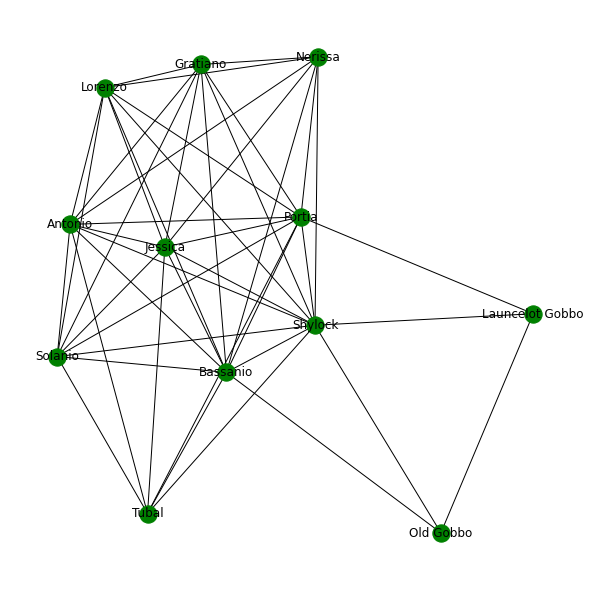

In [37]:
fig = plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G,node_color='green',with_labels = True)
plt.show()

### Graph Visualisation using Pyvis

In [38]:
from pyvis.network import Network

In [ ]:
net = Network(notebook=True, width='1500px',height='1500px')

node_degree = dict(G.degree)

# Setting up node size attribute
nx.set_node_attributes(G,node_degree,'size')

net.from_nx(G)
net.show('MOV.html')